<a href="https://colab.research.google.com/github/hodominic1/Math-152/blob/main/Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Random Walk in Birds
By: David Bartlett, Dean Ben-Zour, Jun Du, Dominic Ho and Perry Xie

##Introduction
Throughout time, there has been a facinating phenomena occuring in the animal kingdom in a seasonal cycle. Every year, twice a year, the majority of bird species act in a unique way, and migrate to the other side of the planet. While the reasoning behind the migration varies from climate and food scarcity, it is still bapheling to notice how almost all birds, from all species, cover almost the exact same route, in every migration. A [research](https://news.cornell.edu/stories/2020/03/ornithology-lab-releases-high-resolution-migration-maps) by the Ornithology lab of Cornell University shows the difference in bird populations in different regions, according to migration patterns. Similar to the central limit theorem, birds are migrating in "random" paths, as they cannot actually coordinate a massive migration, but only trust their personal (or related flock) senses. Moreover, the distribution of routes is fairly normal, and suggest that there is corrolation between birds migration and the central limit theory, which claims that the sum of random variables tends to be normally distributed, or in other words, when testing random variables over time, the central limit theory states that the distribution of results should be in a bell-shaped graph, meaning most of the results will be distributed around the center of the graph.


### Testing for similarity
In our paper, we will simulate bird migrations repeatedly, using random walk theory, and try to prove that there are similarities between the patterns of bird migration and central limit theorem. In order to do so, we will create a function that generates random paths of birds during migration season. With the results of our tests we will create visuals that relate our hypothesis, which is that bird migrate in a pattern similar to central limit theorem. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Simple walk calculation

Before we create our simulation and model, first we wanted to test for results in a simple walk. We created a one dimensional function, where the player can move either to the right or to the left. Based on central limit theorem, if we test this function in large numbers, say large integer N, the average result should be $\sqrt N$ , or close to $\sqrt N$. This make sense, because if the player has two choices with the same probability, after playing a thousand rounds, the results should be equal between the two results.

In [ ]:
def simplewalk(times):
  x = 0 # X position
  # record where X at
  recordX = []  
  # a random list, when result shows 0 then X go left, when result shows 1 then X go right
  flip = np.random.choice([0,1],times)
  for i in flip:
    if i == 0:
      # if X at 0, X could not go left.
      if x != 0:
        x = x - 1
    else:
      x = x + 1
    recordX.append(x)
  return recordX[x]

In [ ]:
simplewalk(100)

0

### Bird Migration Simulation
Next, we want to add another dimension to our function, which will help us simulate the birds' flight direction more accuratly. Adding two more sides, up and down, allows us to create an actual path that the birds will take on their journey. 


In [ ]:
def rand_walk(coord_y, coord_x, step):
    '''
    This function controls the direction of each bird and is used in conjunction with another function to plot every point from its origin to destination. 
    The up and left directions are kept at a lower number than the down and right direction to simulate a real bird migration path. 
    Birds tend to travel in one general direction and this representation simulates flying south for the winter.
    '''
    # Starting Coordinates 
    coord = np.array([coord_y, coord_x, -1])
    directions = np.array([[24,0],  #Down 
                          [-2,0],  #Up
                          [0,24],   #Right
                          [0,-2]]) #Left
    count = 1

    # walked_path keeps track of coordinates of each step
    walked_path = np.zeros((step+1, 3))  # There are 4 options in the direction numpy array
    walked_path[0] = coord
#     print(f'Currently at: {walked_path[0]}')

    while count < step+1:
        # Chooses a random direction 
        index = np.random.randint(4) # Creates 4 integers randomly chosen to assign each to the respective index of the direction numpy array
        walk = directions[index, :]

        # Adds direction to the coordinates 
        coord_y += walk[0] # also can be written as coord_y = coord_y + walk[0] in which the y-coordinate is either moved up or down
        coord_x += walk[1] # coord_x = coord_x + walk[1] in which the x coordinate is either moved left or right
        coord = np.array([coord_y, coord_x, index]) # Creates a numpy array for the coordinates
        walked_path[count] = coord
        count+=1 # count is increased by one until count < step+1
    
    return walked_path

def simulate_flight(bird, step):
    '''
    This function is used to assign a certain number of birds a flight path of a certain number of steps. 
    The starting position is given as a random position within the first green region. 
    This function is responsible for giving the bird its start and for applying the rand_walk function to each random bird.
    '''
    # simulate migratory random walk from start region to end region 
    # start at 50x150 box, coord: (50,50), (50,150), (150,50), (150x150)
    # end at 50x50 box, coord: (350, 450), (350,600), (450, 600), (600,600) 
    # returns 3d array that keeps track of each birds coordinates in each walk

    flight_track = np.zeros((bird, step+1, 3))

    for i in range(bird):
        # Chooses a random starting place from starting box
        start_y = np.random.randint(50, 150)
        start_x = np.random.randint(50, 150)
        flight_track[i] = rand_walk(start_y, start_x, step) #applies the rand_walk function to the birds in the starting region
    
    return flight_track

### PIL Image
We used PIL image to help us visualize the path that each bird is taking in our simulation. Since not all birds start from the exact same point, we added a random factor to the starting point to ensure that each bird will start from a random location. However, since the majority of birds that migrate during the winter are located in the north, all starting locations were constricted to the cyan square, which represents the Northern area. 
The red and blue lines represent the path of each bird in the simulation. There are 100 birds in our simulation, thus there are 100 red and blue paths. The blue lines are for birds that migrated successfully and reached their goal destination in the south, which is represented by the yellow square. respectively, the red lines are for birds that failed in their journey and did not reach their goal destination.

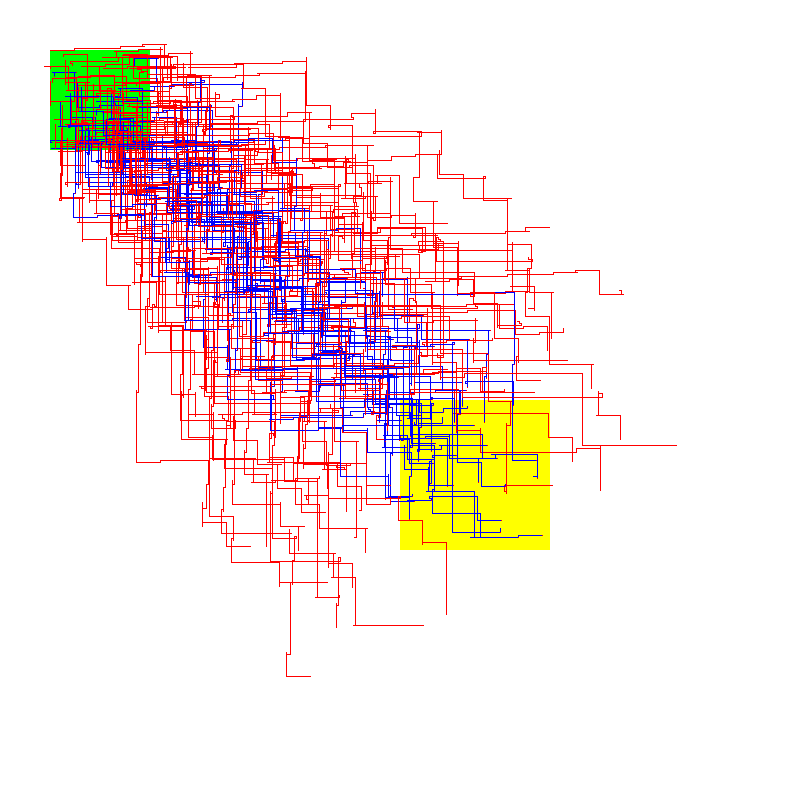

Birds that reached the destination: 31
Birds that did not reach the destination: 69
Percentage reached: 31.0%
Total: 100


In [ ]:
# flight_path keeps track of all bird's walks
flight_path = simulate_flight(100, 60) # There are 100 birds traveling 60 steps

solid = np.zeros((800, 800,3), dtype=np.uint8) # uint8 = unsigned 8-bit integer.  Must be in 0...255.
count = 0

# Set up entire region
for x in range(800):
    for y in range(800):
        solid[y,x] = [255,255,255] 
        
# Start region is created in the upper left side of the region in green
for x in range(50, 150):
    for y in range(50,150):
        solid[y,x] = [0,255,0]
    
# Destination is created in the bottom right side of the region in yellow
for x in range(400, 550):
    for y in range(400, 550):
        solid[y,x] = [255,255,0]
    
# Code checks for whether the last point is in the destination
for flight in flight_path:
    in_destination = False # in_destination used to keep track of the birds that end up in the destination
    end_coord_y = flight[-1][0]
    end_coord_x = flight[-1][1]
    
    # Sets parameters for when the bird has arrived to its destination
    if end_coord_y > 400 and end_coord_y < 550 and end_coord_x > 400 and end_coord_x < 550:
        in_destination = True
        count += 1
    
    # Places a point for each coordinate
    for i in range(flight.shape[0]):
        coord_y = int(flight[i][0])
        coord_x = int(flight[i][1])
        solid[coord_y, coord_x] = [255,0,0] # Each coordinate will be shown as red until the last point is in the destination
        
        # check which direction the point came from and colors in the path
        # Blue if the path is in target destination
        # Red if not

        # prev_y and prev_x are the previous coordinates 
        # traces from current to previous 
        if flight[i][2] == 0: # Down
            if in_destination:
                prev_y = int(flight[i-1][0]) # A prev_y variable is created to make any bird's path entering the destination from above blue
                solid[prev_y:coord_y,coord_x] = [0,0,255]
            else:
                prev_y = int(flight[i-1][0])
                solid[prev_y:coord_y,coord_x] = [255,0,0] # Keeps bird's path that didn't enter above the destination red
                
        elif flight[i][2] == 1: # Up
            if in_destination:
                prev_y = int(flight[i-1][0]) # Again, prev_y variable is created to mark any bird's path entering the destination from below blue
                solid[coord_y:prev_y,coord_x] = [0,0,255]
            else: 
                prev_y = int(flight[i-1][0])
                solid[coord_y:prev_y,coord_x] = [255,0,0] # Keeps bird's path that didn't enter below the destination red
                
        elif flight[i][2] == 2: # Right
            if in_destination:
                prev_x = int(flight[i-1][1]) # A prev_x variable is created to mark any bird's path entering the destination from the right blue
                solid[coord_y,prev_x:coord_x] = [0,0,255]
            else: 
                prev_x = int(flight[i-1][1])
                solid[coord_y,prev_x:coord_x] = [255,0,0] # Keeps bird's path that didn't enter from the right of the destination red
                
        elif flight[i][2] == 3: #Left
            if in_destination:
                prev_x = int(flight[i-1][1]) # Again, prev_x variable is created to mark any bird's path entering the destination from the left blue
                solid[coord_y,coord_x:prev_x] = [0,0,255]
            else:
                prev_x = int(flight[i-1][1])
                solid[coord_y,coord_x:prev_x] = [255,0,0] # Keeps bird's path that didn't enter from the left of the destination red
        
img = Image.fromarray(solid) # Create an image from the array.
display(img)

print(f'Birds that reached the destination: {count}')
print(f'Birds that did not reach the destination: {flight_path.shape[0] - count}')
print(f'Percentage reached: {round((count/flight_path.shape[0])*100, 2)}%') 
print(f'Total: {flight_path.shape[0]}')



In order to see the pattern in the simulation, we observe the distance from the ending point of each bird, and the goal destination. For this simulation, the starting point was similar for all birds, at $75$, and the goal destination was set to $550$. We created a histogram to check for a trend in the simulation. Our x axis was based on the distance between the starting point and the end point, while our y axis was used to count the amount of birds that reached about the same point.
Indeed we could see a trend that resembles a bell-shaped curve, with most of the birds reaching a point between the starting point and the goal point, a few birds that barely moved from the starting point, and about a third of the bird that reached the destination.

In [ ]:
def calc_dist(start, end): # Distance formula
    '''
    This function applies the distance formula to each bird's path
    '''
    x_diff = start[0] - end[0]
    y_diff = start[1] - end[1]
    distance = np.sqrt((x_diff**2)+(y_diff**2)) #distance formula
    return round(distance, 4) #returns rounded distance


flight_distance = [] # Array to store the distances 
for flight in flight_path: 
  distance = calc_dist(flight[0], flight[-1])  # flight[0] is the first coordinate, fight[-1] is the last coordinate
  flight_distance.append(distance) 

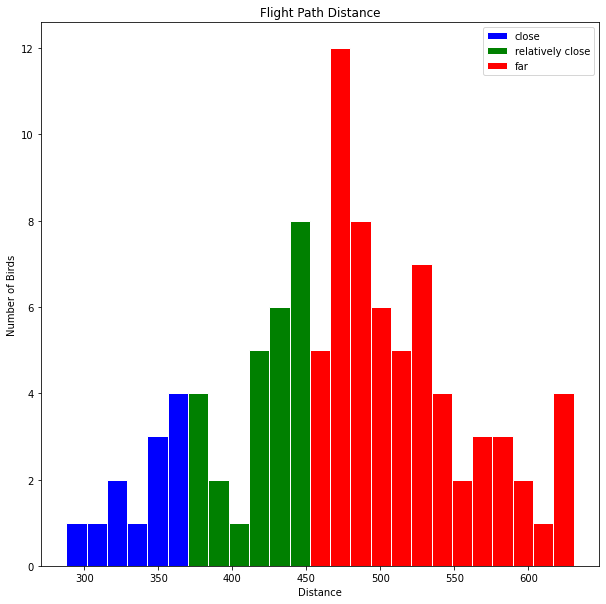

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
n, bins, patches = plt.hist(flight_distance, bins = 25, ec = 'white', linewidth = 1)
# Set the bars in certain ranges different colors
for i in range(0,6):
  patches[i].set_facecolor('b')
for i in range(6, 12):
  patches[i].set_facecolor('g')
for i in range(12, 25):
  patches[i].set_facecolor('r')
patches[0].set_label('close')
patches[6].set_label('relatively close')
patches[12].set_label('far')
plt.legend()
plt.title('Flight Path Distance') # Figure label
plt.xlabel('Distance') # x-label
plt.ylabel('Number of Birds') # y-label
plt.show()

##Conclusion

Even though our histogram wasn’t close to perfect, we must consider that we had only done 100 tests. Any more and it would’ve been harder to read the PIL graph. The more tests that are run, the more accurate and the closer we get to the shape of the bell curve for the histogram. In short, with creating a simulation of bird migration, graphing it into a PIL and histogram, and studying the results, we can conclude that there is a correlation between bird migration and the central limit theorem using random walk theory. 
